<div style="display: flex; align-items: center; justify-content: space-between; background-color: #1e355f; padding: 30px;">
    <div>
        <h1 style="color: white; text-align: center; font-weight: bold;">Datos No Estructurados: IMAGEN</h1>
        <h2 style="color: white; text-align: center;">Clasificador de Melanoma</h2>
    </div>

</div>

<div style="padding: 5px;">
    <h3 style="color: #1e355f; font-weight: bold;">Realizado por:</h3>
</div>

- Álvaro Ezquerro Pérez
- María Calvo de Mora Román
- Celia Quiles Alemañ


<div style="display: flex; align-items: center; justify-content: space-between; background-color: #1e355f; padding: 10px;">
    <div>
        <h1 style="color: white; text-align: center; font-weight: bold;">Fine Tuning</h1>
    </div>
</div>


<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Introducción:</h2>
</div>

El fine-tuning es una técnica crucial en el aprendizaje profundo que implica adaptar modelos preentrenados a tareas específicas. Al tomar un modelo previamente entrenado en un conjunto de datos más amplio, el fine-tuning permite ajustar sus parámetros para que se adapten a un conjunto de datos más específico, lo que a menudo resulta en un rendimiento superior con menos datos y tiempo de entrenamiento reducido. Esta estrategia, que implica congelar algunas capas para retener el conocimiento previo y ajustar otras para la nueva tarea, ha demostrado ser invaluable en la aceleración del desarrollo y la mejora del rendimiento de los sistemas de inteligencia artificial en una variedad de aplicaciones.

Entre las diversas arquitecturas de CNN, tres se destacan por sus características distintivas: MobileNetV3_small, VGG11 y ResNet50.

**MobileNetV3_small: Eficiencia en Movimiento**

MobileNetV3_small es la culminación de la búsqueda de la eficiencia en dispositivos móviles. Diseñado para ser ligero y rápido, esta arquitectura utiliza convoluciones separables en profundidad para reducir drásticamente el costo computacional sin comprometer la precisión. Además, incorpora bloques de Squeeze-and-Excitation (SE) para adaptar dinámicamente las respuestas de características, lo que lo hace ideal para aplicaciones en tiempo real en dispositivos con recursos limitados.

**VGG11: Simplicidad Elegante**

En el otro extremo del espectro se encuentra VGG11, una joya de simplicidad en el mundo de las CNN. Con solo 11 capas, este modelo se destaca por su diseño claro y fácil de entender. Su éxito radica en el apilamiento profundo de capas convolucionales con pequeños filtros de 3x3, lo que le permite aprender características complejas. Aunque puede carecer de la eficiencia de MobileNetV3_small, su simplicidad lo hace una opción atractiva para tareas donde la interpretabilidad es clave.

**ResNet50: El Gigante de la Profundidad**

Cuando se trata de profundidad, ResNet50 reina supremo. Introduciendo bloques de aprendizaje residual, esta arquitectura permite entrenar redes profundas sin el temido problema del gradiente desvaneciente. Sus conexiones de salto facilitan el flujo de gradientes, lo que lo convierte en la elección predilecta para tareas exigentes como la clasificación de imágenes y la detección de objetos. Sin embargo, su complejidad y costo computacional pueden ser un desafío para dispositivos con recursos limitados.

En resumen, MobileNetV3_small, VGG11 y ResNet50 representan tres enfoques distintos en el fascinante mundo de las CNN. Ya sea priorizando la eficiencia, la simplicidad o la profundidad, estas arquitecturas continúan impulsando el avance de la visión por computadora y la inteligencia artificial en general.

A continuación, vamos a reentrenar estas tres redes para nuestra tarea de clasificación de melanomas y compararlas entre sí. Como último apartado, hemos implementado una función que permite cargar los modelos ya preentrenados que se han ejecutado en el notebook para poder comprobar su eficiencia y predecir imagenes.



<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Código:</h2>
</div>

In [8]:
import sys
import os
import torch

import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Own modules
notebook_path = os.getcwd()
if notebook_path not in sys.path:
    sys.path.append(notebook_path)
project_path = os.path.dirname(os.path.dirname(notebook_path))
if project_path not in sys.path:
    sys.path.append(project_path)

from src.finetuning import fine_tune_model, load_pretrained_model, plot_training, load_prediction_data

In [2]:
# Fine-tune modelo preentrenado

# Load data
TRAIN_DIR = os.path.join(project_path, 'data', 'train')
TEST_DIR = os.path.join(project_path, 'data', 'test')

BATCH_SIZE = 64

<div style="padding: 5px;">
    <h3 style="color: #1e355f; font-weight: bold;">ResNet50:</h3>
</div>

In [2]:
# Model and training parameters
PRETRAINED_MODEL_NAME = "resnet50"
IMG_SIZE = 224 # Pretrained model input size
UNFREEZED_LAYERS = 2
EPOCHS = 20
DROPOUT = 0.2
LEARNING_RATE = 1e-4

MODEL_SAVING_NAME = f"{PRETRAINED_MODEL_NAME}-{EPOCHS}epoch-{LEARNING_RATE}lr-{BATCH_SIZE}bs-{DROPOUT}do-{UNFREEZED_LAYERS}unlay"

In [3]:
# Train model
model, history = fine_tune_model(
    pretrained_model_name=PRETRAINED_MODEL_NAME,
    train_dir=TRAIN_DIR,
    test_dir=TEST_DIR,
    batch_size=BATCH_SIZE,
    img_size=IMG_SIZE,
    model_saving_name=MODEL_SAVING_NAME,
    epochs=EPOCHS,
    learning_rate=LEARNING_RATE,
    unfreezed_layers=UNFREEZED_LAYERS,
    dropout=DROPOUT,
    proyect_path=project_path,
    device=device,
)

Using cache found in /home/alvaro/.cache/torch/hub/pytorch_vision_main


Epoch: 20
Model: ResNet
Unfreezed layers: 2
Dropout: 0.2
Learning rate: 0.0001
Optimizer: Adam
Criterion: CrossEntropyLoss
Number of Classes: 2
Epoch 1/20 - Train Loss: 0.5317, Train Accuracy: 0.8177
Epoch 1/20 - Validation Loss: 0.4507, Validation Accuracy: 0.8860
Epoch 2/20 - Train Loss: 0.4546, Train Accuracy: 0.8637
Epoch 2/20 - Validation Loss: 0.4332, Validation Accuracy: 0.8900
Epoch 3/20 - Train Loss: 0.4346, Train Accuracy: 0.8781
Epoch 3/20 - Validation Loss: 0.4252, Validation Accuracy: 0.8910
Epoch 4/20 - Train Loss: 0.4241, Train Accuracy: 0.8909
Epoch 4/20 - Validation Loss: 0.4261, Validation Accuracy: 0.8880
Epoch 5/20 - Train Loss: 0.4225, Train Accuracy: 0.8902
Epoch 5/20 - Validation Loss: 0.4212, Validation Accuracy: 0.9010
Epoch 6/20 - Train Loss: 0.4220, Train Accuracy: 0.8899
Epoch 6/20 - Validation Loss: 0.4256, Validation Accuracy: 0.8900
Epoch 7/20 - Train Loss: 0.4157, Train Accuracy: 0.8966
Epoch 7/20 - Validation Loss: 0.4206, Validation Accuracy: 0.8980
Ep

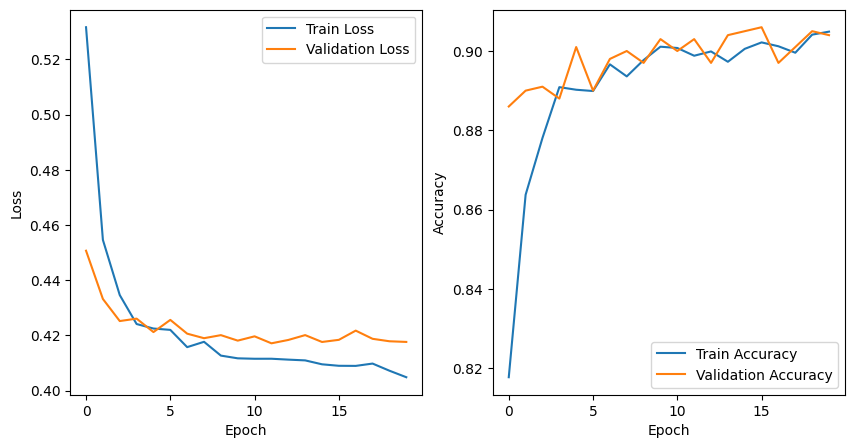

In [4]:
# Plot training history
plot_training(history)

<div style="padding: 5px;">
    <h3 style="color: #1e355f; font-weight: bold;">MobileNetV3 Small:</h3>
</div>

In [5]:
# Model and training parameters
PRETRAINED_MODEL_NAME = "mobilenet_v3_small"
IMG_SIZE = 224 # Pretrained model input size
UNFREEZED_LAYERS = 2
EPOCHS = 20
DROPOUT = 0.2
LEARNING_RATE = 1e-4

MODEL_SAVING_NAME = f"{PRETRAINED_MODEL_NAME}-{EPOCHS}epoch-{LEARNING_RATE}lr-{BATCH_SIZE}bs-{DROPOUT}do-{UNFREEZED_LAYERS}unlay"

In [6]:
# Train model
model, history = fine_tune_model(
    pretrained_model_name=PRETRAINED_MODEL_NAME,
    train_dir=TRAIN_DIR,
    test_dir=TEST_DIR,
    batch_size=BATCH_SIZE,
    img_size=IMG_SIZE,
    model_saving_name=MODEL_SAVING_NAME,
    epochs=EPOCHS,
    learning_rate=LEARNING_RATE,
    unfreezed_layers=UNFREEZED_LAYERS,
    dropout=DROPOUT,
    proyect_path=project_path,
    device=device,
)

Using cache found in /home/alvaro/.cache/torch/hub/pytorch_vision_main


Epoch: 20
Model: MobileNetV3
Unfreezed layers: 2
Dropout: 0.2
Learning rate: 0.0001
Optimizer: Adam
Criterion: CrossEntropyLoss
Number of Classes: 2
Epoch 1/20 - Train Loss: 0.5500, Train Accuracy: 0.8072
Epoch 1/20 - Validation Loss: 0.5069, Validation Accuracy: 0.8240
Epoch 2/20 - Train Loss: 0.4701, Train Accuracy: 0.8480
Epoch 2/20 - Validation Loss: 0.4561, Validation Accuracy: 0.8740
Epoch 3/20 - Train Loss: 0.4574, Train Accuracy: 0.8567
Epoch 3/20 - Validation Loss: 0.4313, Validation Accuracy: 0.8870
Epoch 4/20 - Train Loss: 0.4488, Train Accuracy: 0.8605
Epoch 4/20 - Validation Loss: 0.4273, Validation Accuracy: 0.8880
Epoch 5/20 - Train Loss: 0.4480, Train Accuracy: 0.8632
Epoch 5/20 - Validation Loss: 0.4243, Validation Accuracy: 0.8980
Epoch 6/20 - Train Loss: 0.4464, Train Accuracy: 0.8638
Epoch 6/20 - Validation Loss: 0.4235, Validation Accuracy: 0.9000
Epoch 7/20 - Train Loss: 0.4402, Train Accuracy: 0.8723
Epoch 7/20 - Validation Loss: 0.4230, Validation Accuracy: 0.89

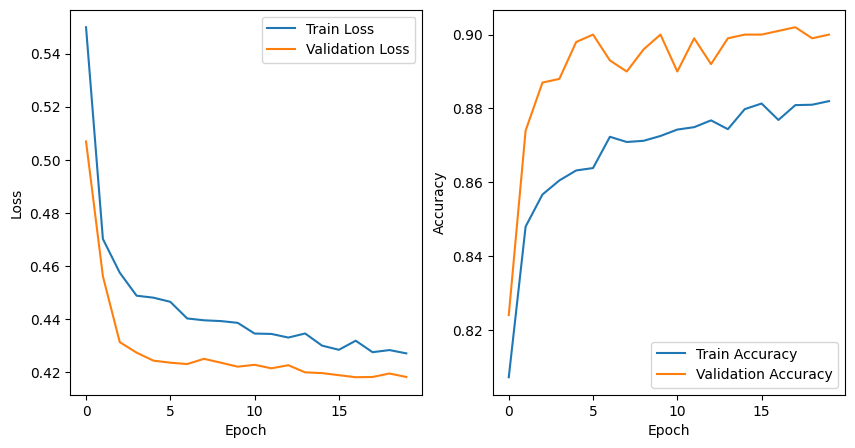

In [7]:
# Plot training history
plot_training(history)

<div style="padding: 5px;">
    <h3 style="color: #1e355f; font-weight: bold;">VGG11:</h3>
</div>

In [10]:
# Model and training parameters
PRETRAINED_MODEL_NAME = "vgg11"
IMG_SIZE = 224 # Pretrained model input size
UNFREEZED_LAYERS = 2
EPOCHS = 20
DROPOUT = 0.2
LEARNING_RATE = 1e-4

MODEL_SAVING_NAME = f"{PRETRAINED_MODEL_NAME}-{EPOCHS}epoch-{LEARNING_RATE}lr-{BATCH_SIZE}bs-{DROPOUT}do-{UNFREEZED_LAYERS}unlay"

In [12]:
# Train model
model, history = fine_tune_model(
    pretrained_model_name=PRETRAINED_MODEL_NAME,
    train_dir=TRAIN_DIR,
    test_dir=TEST_DIR,
    batch_size=BATCH_SIZE,
    img_size=IMG_SIZE,
    model_saving_name=MODEL_SAVING_NAME,
    epochs=EPOCHS,
    learning_rate=LEARNING_RATE,
    unfreezed_layers=UNFREEZED_LAYERS,
    dropout=DROPOUT,
    proyect_path=project_path,
    device=device,
)

Using cache found in /home/alvaro/.cache/torch/hub/pytorch_vision_main
Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /home/alvaro/.cache/torch/hub/checkpoints/vgg11-8a719046.pth
100.0%


Epoch: 20
Model: VGG
Unfreezed layers: 2
Dropout: 0.2
Learning rate: 0.0001
Optimizer: Adam
Criterion: CrossEntropyLoss
Number of Classes: 2
Epoch 1/20 - Train Loss: 0.4943, Train Accuracy: 0.8186
Epoch 1/20 - Validation Loss: 0.4358, Validation Accuracy: 0.8780
Epoch 2/20 - Train Loss: 0.4526, Train Accuracy: 0.8581
Epoch 2/20 - Validation Loss: 0.4255, Validation Accuracy: 0.8930
Epoch 3/20 - Train Loss: 0.4430, Train Accuracy: 0.8654
Epoch 3/20 - Validation Loss: 0.4294, Validation Accuracy: 0.8850
Epoch 4/20 - Train Loss: 0.4377, Train Accuracy: 0.8692
Epoch 4/20 - Validation Loss: 0.4393, Validation Accuracy: 0.8710
Epoch 5/20 - Train Loss: 0.4400, Train Accuracy: 0.8675
Epoch 5/20 - Validation Loss: 0.4240, Validation Accuracy: 0.8870
Epoch 6/20 - Train Loss: 0.4309, Train Accuracy: 0.8797
Epoch 6/20 - Validation Loss: 0.4177, Validation Accuracy: 0.9000
Epoch 7/20 - Train Loss: 0.4313, Train Accuracy: 0.8776
Epoch 7/20 - Validation Loss: 0.4242, Validation Accuracy: 0.8880
Epoch

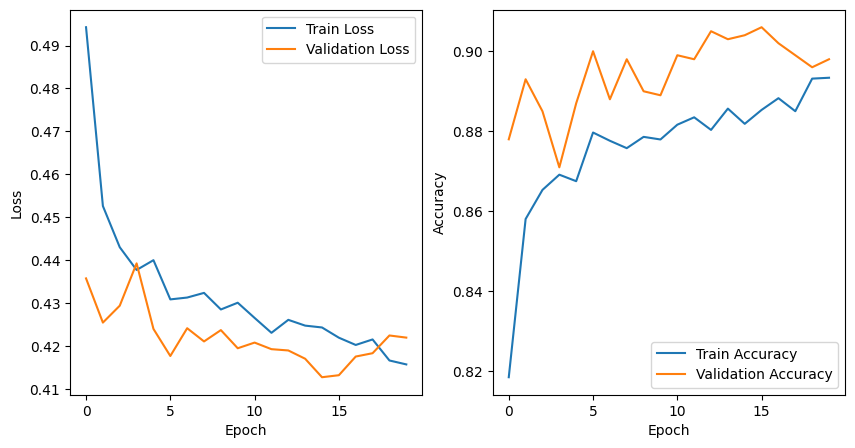

In [13]:
# Plot training history
plot_training(history)

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Comparación de modelos:</h2>
</div>

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Carga de modelos y predicción:</h2>
</div>

In [26]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.squeeze().numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    fig = plt.figure()
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    return fig

def show_results(data_loader, prediction, output_clases):
    classname = output_clases[prediction]
    image_tensor = next(iter(data_loader))[0]
    imshow(image_tensor, title=f"{classname}")

In [ ]:
# Cargar modelo de "models/"
MODEL_SAVING_NAME = "resnet50-20epoch-0.0001lr-64bs-0.2do-2unlay"
SAVED_MODEL_PATH = os.path.join(project_path, "models", f"{MODEL_SAVING_NAME}")

# All this parameters should be the same as in the loaded model
SAVED_PRETRAINED_MODEL = "resnet50" 
SAVED_MODEL_UNFREEZED_LAYERS = 0
SAVED_MODEL_DROPOUT = 0
SAVED_MODEL_OUTPUT_CLASSES = ["benign", "malignant"] # Important to set in the same order as the model was trained

model = load_pretrained_model(
    SAVED_MODEL_PATH,
    SAVED_PRETRAINED_MODEL,
    SAVED_MODEL_OUTPUT_CLASSES,
    SAVED_MODEL_UNFREEZED_LAYERS,
    SAVED_MODEL_DROPOUT,
    device,
)

In [20]:
# Predecir
PREDICTION_DIR = os.path.join(project_path, "data", 'prediction')

data_loader = load_prediction_data(PREDICTION_DIR, img_size=224)

predicted_labels = model.predict(data_loader, device=device)

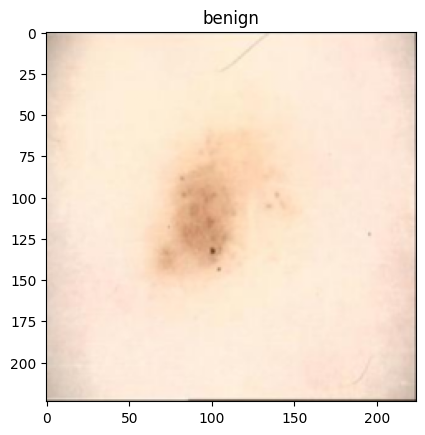

In [27]:
show_results(data_loader, predicted_labels[0], SAVED_MODEL_OUTPUT_CLASSES)